## SEM

In [1]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import gridspec


In [2]:
# Ensure custom module path is set before import
sys.path.append(r"D:\CHENG\OneDrive - UAB\ICMAB-Python\Figure")
from colors import tol_cmap, tol_cset  # type: ignore

# 画图的初始设置
plt.style.use(r"D:\CHENG\OneDrive - UAB\ICMAB-Python\Figure\liuchzzyy.mplstyle")
# print(plt.style.available)  # noqa: ERA001

# xarray setting
xr.set_options(
    cmap_sequential="viridis",
    cmap_divergent="viridis",
    display_width=150,
)  # viridis, gray

# 颜色设定
colors = list(tol_cset("vibrant"))
if r"sunset" not in plt.colormaps():
    plt.colormaps.register(tol_cmap("sunset"))
if r"rainbow_PuRd" not in plt.colormaps():
    plt.colormaps.register(tol_cmap("rainbow_PuRd"))  # 备用 plasma

# 输出的文件夹
path_out = Path(r"C:\Users\chengliu\Desktop\Figure")

In [3]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar


def add_sizebar(ax, size, scale, units, color, sep=1):  # noqa: PLR0913
    asb = AnchoredSizeBar(
        ax.transData,
        size / scale,
        "{} {}".format(size, units),
        # None,
        loc="lower left",
        pad=0.1,
        borderpad=0.5,
        sep=sep,
        frameon=False,
        color=color,
        label_top=True,
    )
    ax.add_artist(asb)
    return asb

### SEM 图片，α-MnO2, 1stCharge, Electrode

In [25]:
# 读取数据
path_file = Path(r"D:\CHENG\OneDrive - UAB\ICMAB-Data\Zn-Mn\Results\SEM\ExSitu\αMnO2\Charge\Electrode\Cycled1.85V\CoinCell-afterOperandoXAS\Data")  # noqa: E501, RUF001
path_file = Path.joinpath(path_file, r"Pos3_cathsep_011.tif")
im = plt.imread(path_file)

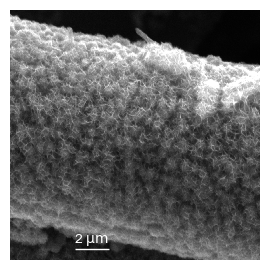

In [30]:
from matplotlib.transforms import Bbox

%matplotlib inline
plt.close("all")
fig = plt.figure(figsize=(3.3, 2.5))
gs = gridspec.GridSpec(1, 1, width_ratios=None, height_ratios=None, wspace=0, hspace=0, figure=fig)

# 图
subfig = fig.add_subfigure(gs[0, 0], zorder=0)
ax = subfig.add_subplot()
ax.set_position((0, 0, 1.0, 1.0))
ima = im[:-60, :]

delta = abs(ima.shape[0] - ima.shape[1]) / 2
extent = (-delta, ima.shape[1] + delta, 0, ima.shape[0]) if ima.shape[0] > ima.shape[1] else (0, ima.shape[1], -delta, ima.shape[0] + delta)  # noqa: E501

ax.imshow(ima, cmap="gray", extent=extent, interpolation="nearest", aspect="equal", zorder=1)

sizebar = add_sizebar(ax, 2, 0.0145, r"$\mathrm{\mu m}$", "w")
sizebar.set_bbox_to_anchor(Bbox.from_bounds(0.2, 0.05, 0, 0).transformed(ax.transAxes))
ax.set_axis_off()
ax.tick_params(
    axis="both",
    which="both",
    bottom=False,
    top=False,
    left=False,
    labelbottom=False,
    labelleft=False,
)

# 保存图像
plt.savefig(
    Path.joinpath(path_out, f"300_{path_file.stem}.tif"),
    pad_inches=0.01,
    bbox_inches="tight",
    dpi=300,
    transparent=False,
    pil_kwargs={"compression": "tiff_lzw"},
)
plt.savefig(
    Path.joinpath(path_out, f"600_{path_file.stem}.tif"),
    pad_inches=0.01,
    bbox_inches="tight",
    dpi=600,
    transparent=False,
    pil_kwargs={"compression": "tiff_lzw"},
)
plt.gcf().set_facecolor("white")
plt.show()

### SEM 图片，SuperP+Bacterial Cellulose, Pristine

In [ ]:
# 读取数据
path_file = Path(
    r"D:\CHENG\OneDrive - UAB\ICMAB-Data\Zn-Mn\Results\SEM\ExSitu\Bacterial Cellulose\SuperP+Bacterial Cellulose\Pristine\BC_40wt%\Data"
)
path_file = Path.joinpath(path_file, r"BC_40_019.tif")
im = plt.imread(path_file)

In [ ]:
from matplotlib.transforms import Bbox

%matplotlib inline
plt.close("all")
fig = plt.figure(figsize=(3.3, 2.5))
gs = gridspec.GridSpec(1, 1, width_ratios=None, height_ratios=None, wspace=0, hspace=0, figure=fig)

# 图
subfig = fig.add_subfigure(gs[0, 0], zorder=0)
ax = subfig.add_subplot()
ax.set_position((0, 0, 1.0, 1.0))
ima = im[:-60, :]
ax.imshow(ima, cmap="gray")

sizebar = add_sizebar(ax, 500, 2.9, r"$\mathrm{nm}$", "w", sep=2)
# sizebar = add_sizebar(ax, 0.5, 0.0029, r'$\mathrm{\mu m}$', 'w', sep=2)  # noqa: ERA001
sizebar.set_bbox_to_anchor(Bbox.from_bounds(0.1, 0.05, 0, 0).transformed(ax.transAxes))
ax.set_axis_off()
ax.tick_params(
    axis="both",
    which="both",
    bottom=False,
    top=False,
    left=False,
    labelbottom=False,
    labelleft=False,
)

# 保存图像
plt.savefig(
    Path.joinpath(path_out, f"300_{path_file.stem}.tif"),
    pad_inches=0.01,
    bbox_inches="tight",
    dpi=300,
    transparent=False,
    pil_kwargs={"compression": "tiff_lzw"},
)
plt.savefig(
    Path.joinpath(path_out, f"600_{path_file.stem}.tif"),
    pad_inches=0.01,
    bbox_inches="tight",
    dpi=600,
    transparent=False,
    pil_kwargs={"compression": "tiff_lzw"},
)
plt.gcf().set_facecolor("white")
plt.show()

### SEM 图片，α-MnO2, 1stDischarge, Electrode

In [ ]:
# 读取数据
path_file = Path(r"D:\CHENG\OneDrive - UAB\ICMAB-Data\Zn-Mn\Results\SEM\ExSitu\αMnO2\Charge\Electrode\1st0.9V\Data")
path_file = Path.joinpath(path_file, r"1stDis_008.tif")
im = plt.imread(path_file)

In [ ]:
from matplotlib.transforms import Bbox

%matplotlib inline
plt.close("all")
fig = plt.figure(figsize=(3.3, 2.5))
gs = gridspec.GridSpec(1, 1, width_ratios=None, height_ratios=None, wspace=0, hspace=0, figure=fig)

# 图
subfig = fig.add_subfigure(gs[0, 0], zorder=0)
ax = subfig.add_subplot()
ax.set_position((0, 0, 1.0, 1.0))
ima = im[:-60, :]
ax.imshow(ima, cmap="gray")

sizebar = add_sizebar(ax, 10, 0.058, r"$\mathrm{\mu m}$", "w")
sizebar.set_bbox_to_anchor(Bbox.from_bounds(0.1, 0.05, 0, 0).transformed(ax.transAxes))
ax.set_axis_off()
ax.tick_params(
    axis="both",
    which="both",
    bottom=False,
    top=False,
    left=False,
    labelbottom=False,
    labelleft=False,
)

# 保存图像
plt.savefig(
    Path.joinpath(path_out, f"300_{path_file.stem}.tif"),
    pad_inches=0.01,
    bbox_inches="tight",
    dpi=300,
    transparent=False,
    pil_kwargs={"compression": "tiff_lzw"},
)
plt.savefig(
    Path.joinpath(path_out, f"600_{path_file.stem}.tif"),
    pad_inches=0.01,
    bbox_inches="tight",
    dpi=600,
    transparent=False,
    pil_kwargs={"compression": "tiff_lzw"},
)
plt.gcf().set_facecolor("white")
plt.show()

### SEM 图片，α-MnO2, Prisitne, Electrode

In [ ]:
# 读取数据
path_file = Path(r"D:\CHENG\OneDrive - UAB\ICMAB-Data\Zn-Mn\Results\SEM\ExSitu\αMnO2\Pristine\Electrode\Data")
path_file = Path.joinpath(path_file, r"pristine aMnO2 electrode-2.tif")
im = plt.imread(path_file)

In [ ]:
from matplotlib.transforms import Bbox

%matplotlib inline
plt.close("all")
fig = plt.figure(figsize=(3.3, 2.5))
gs = gridspec.GridSpec(1, 1, width_ratios=None, height_ratios=None, wspace=0, hspace=0, figure=fig)

# 图
subfig = fig.add_subfigure(gs[0, 0], zorder=0)
ax = subfig.add_subplot()
ax.set_position((0, 0, 1.0, 1.0))
ima = im[:-60, :]
ax.imshow(ima, cmap="gray")

sizebar = add_sizebar(ax, 10, 0.058, r"$\mathrm{\mu m}$", "w")
sizebar.set_bbox_to_anchor(Bbox.from_bounds(0.2, 0.1, 0, 0).transformed(ax.transAxes))
ax.set_axis_off()
ax.tick_params(
    axis="both",
    which="both",
    bottom=False,
    top=False,
    left=False,
    labelbottom=False,
    labelleft=False,
)

# 保存图像
plt.savefig(
    Path.joinpath(path_out, f"300_{path_file.stem}.tif"),
    pad_inches=0.01,
    bbox_inches="tight",
    dpi=300,
    transparent=False,
    pil_kwargs={"compression": "tiff_lzw"},
)
plt.savefig(
    Path.joinpath(path_out, f"600_{path_file.stem}.tif"),
    pad_inches=0.01,
    bbox_inches="tight",
    dpi=600,
    transparent=False,
    pil_kwargs={"compression": "tiff_lzw"},
)
plt.gcf().set_facecolor("white")
plt.show()